# Новый раздел

In [5]:
# Завантажити датасет Student_data.csv.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Student_data.csv'
df = pd.read_csv(file_path)
# Роздрукувати перші 5 рядків.
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
# Вивести розмір датасета, типи даних.
df.shape

(2392, 15)

In [6]:
df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


In [7]:
# Перевірити на пропущені значення. При наявності замінити на середнє за стовпцем.
print("Пропущені значення:\n", df.isnull().sum())
df = df.fillna(df.mean(numeric_only=True))

Пропущені значення:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [8]:
# Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.
print(f"Кількість дублікатів: {df.duplicated().sum()}")

Кількість дублікатів: 0


In [10]:
# Визначити, яку задачу розв’язуємо (регресія чи класифікація). Побудувати 3 моделі на вибір для визначення оцінки. Підібрати оптимальні параметри. Оцінити моделі.
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Найкращі параметри для Random Forest:", grid_search_rf.best_params_)
print("Найкраща точність перехресної перевірки для Random Forest:", grid_search_rf.best_score_)

y_pred_rf = grid_search_rf.predict(X_test)
print("Точність  Random Forest:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Найкращі параметри для Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Найкраща точність перехресної перевірки для Random Forest: 0.9210640711932525
Точність  Random Forest: 0.8872651356993737


In [11]:
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'linear']}

svm = SVC(random_state=42)

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

print("Найкращі параметри для SVM:", grid_search_svm.best_params_)
print("Найкраща точність перехресної перевірки для SVM:", grid_search_svm.best_score_)

y_pred_svm = grid_search_svm.predict(X_test)
print("Точність SVM:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Найкращі параметри для SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Найкраща точність перехресної перевірки для SVM: 0.8557147348707502
Точність SVM: 0.824634655532359


In [12]:
param_grid_lr = {'penalty': ['l1', 'l2'],
                 'C': [0.01, 0.1, 1, 10, 100],
                 'solver': ['liblinear', 'saga']}

lr = LogisticRegression(random_state=42, max_iter=1000)

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

print("Найкращі параметри для Logistic Regression:", grid_search_lr.best_params_)
print("Найкраща точність перехресної перевірки для Logistic Regression:", grid_search_lr.best_score_)

y_pred_lr = grid_search_lr.predict(X_test)
print("Точність Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Найкращі параметри для Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Найкраща точність перехресної перевірки для Logistic Regression: 0.7710333137396963
Точність Logistic Regression: 0.7369519832985386


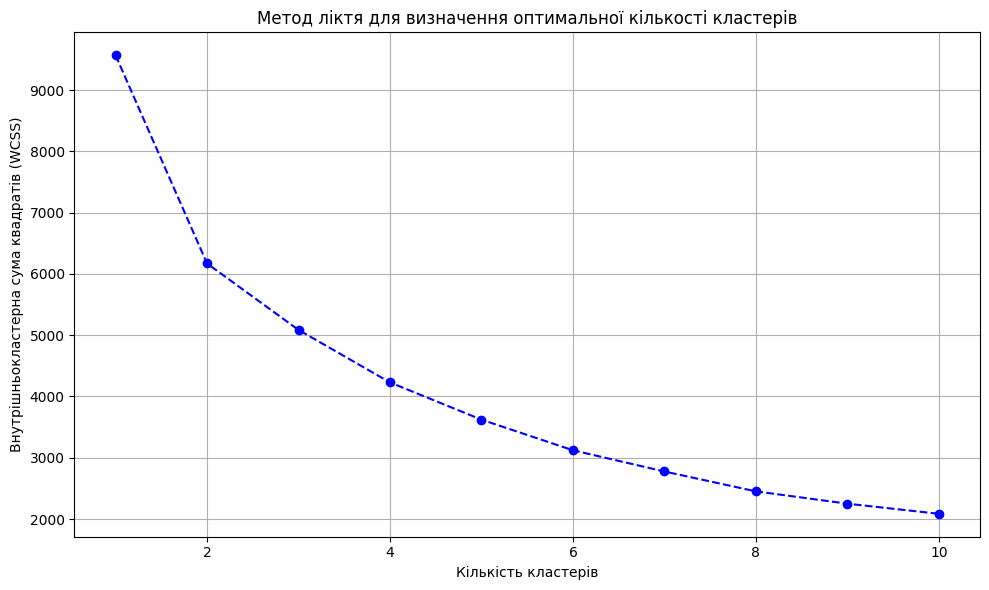

In [13]:
# Визначити методом ліктя і силуєтів оптимальну кількість кластерів
# Вибір ознак для кластеризації
features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Розрахунок WCSS для різної кількості кластерів
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Побудова графіку методу ліктя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньокластерна сума квадратів (WCSS)')
plt.grid(True)
plt.tight_layout()
plt.show()


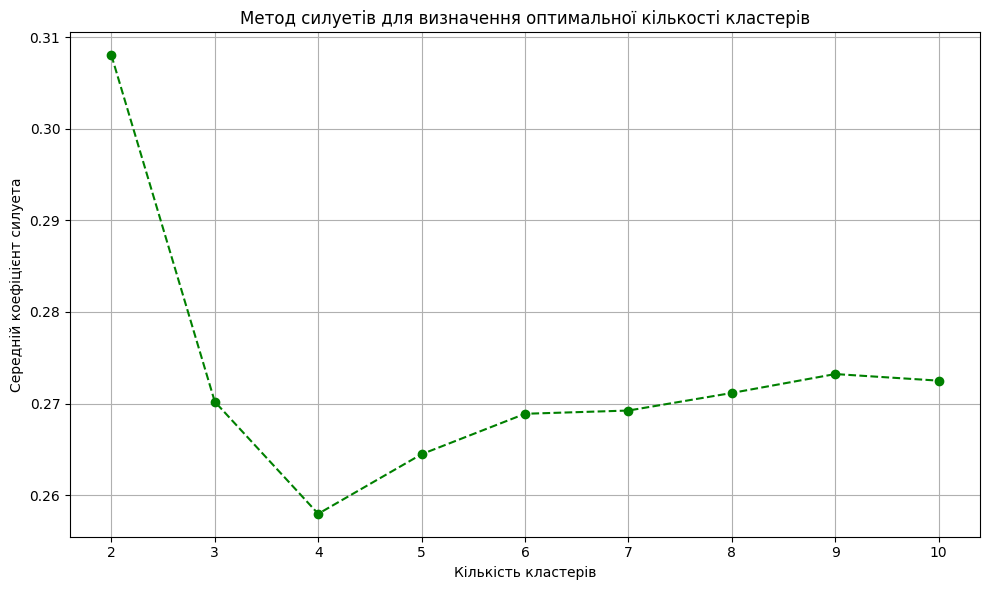

In [14]:
# Розрахунок середніх значень силуета для різної кількості кластерів
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Побудова графіку методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуета')
plt.grid(True)
plt.tight_layout()
plt.show()


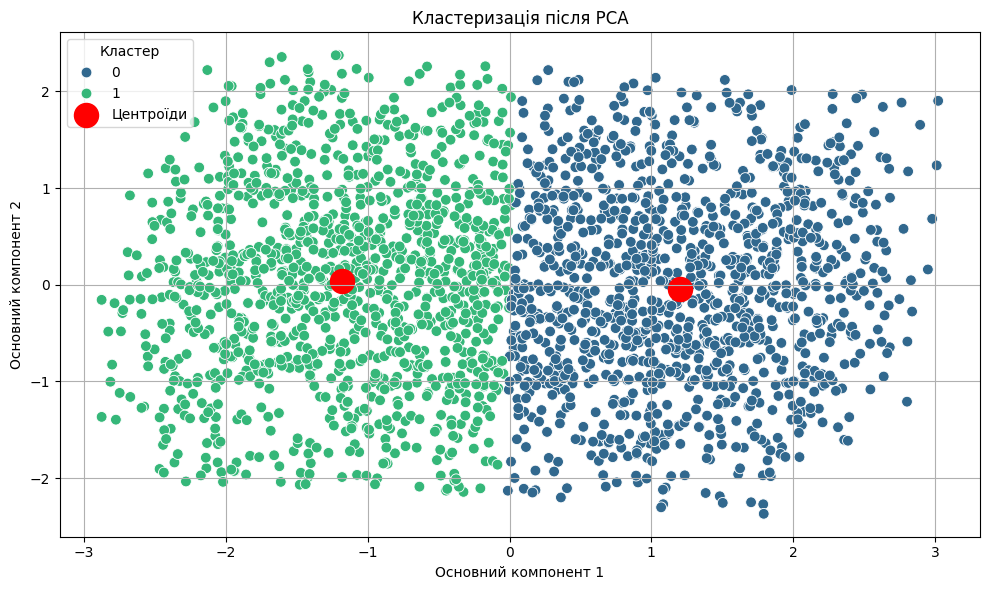

In [17]:
# Візуалізувати кластери.
# Зменшення розмірності за допомогою PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Кластеризація за допомогою KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Центроїди')
plt.title('Кластеризація після PCA')
plt.xlabel('Основний компонент 1')
plt.ylabel('Основний компонент 2')
plt.legend(title='Кластер')
plt.grid(True)
plt.tight_layout()
plt.show()
